<a href="https://colab.research.google.com/github/BirenderPanwar/EVA4_Phase1/blob/master/session7/EVA4S7_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check for current directory and necessary files availability

In [1]:
# check current directory
!pwd

/content


In [2]:
# change to working directory
cd 'session7'

/content/session7


In [3]:
# display all the files in current directory
!ls

cifar10_net.py	data_utils.py	plot_utils.py  readme.md
data		model_utils.py	__pycache__    regularization.py


# Load custom python packages

In [0]:
import torch

# load custom python packages
import data_utils as dutils   # utilities for dataset, transform, dataloaders
import model_utils as mutils  # utilities for basic conv block, depthwise seperable blocks, train, test, build fucntions
import plot_utils as putils   # utilities for ploting images, model history, misclassified images etc
import regularization         # L1 loss fxn
import cifar10_net            # CIFAR10 network design

%matplotlib inline

# Check GPU avaiability
use cuda and get device with GPU

In [5]:
# check GPU availability and use cuda to get GPU device
device = dutils.get_device()

CUDA Available? True
cuda:0


# Basis configurations for CIFAR10

In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

SEED = 1
batch_size=128

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# Load CIFAR10 dataset

In [7]:
# load CIFAR10 dataset
train_loader, test_loader = dutils.get_dataloader(batch_size=batch_size, num_workers=4)

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


# Visualize few training dataset images

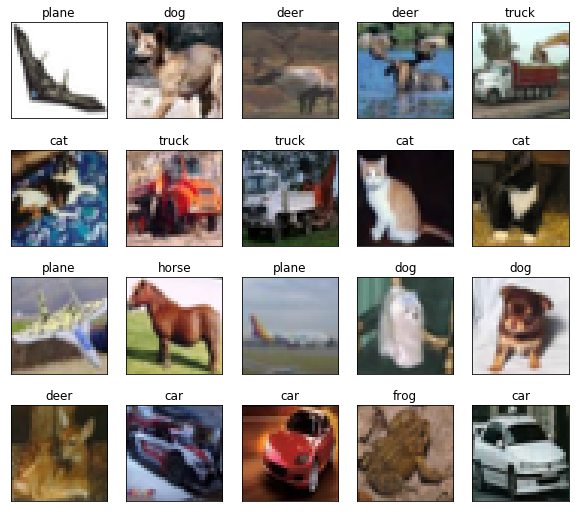

In [8]:
# visualize few training dataset images
putils.plot_dataset_images(device, classes, train_loader)

# Create CIFAR10 Network

1. Model is using 4 convolution blocks
2. Each Convolution blocks is followed by transistion block of maxpooling and 1X1 conv except for last con block. this is for channel size reduction using maxpooling as well of combining of channels using point wise convolution
3. Depth wise seperable convolution is used for last convoltuion blocks
4. Dilation is used for second conv block
5. GAP is used

In [9]:
# Create CIFAR10 network
model = cifar10_net.Cifar10Net(drop_val=0.10)
mutils.model_summary(model, device, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
 Conv2d_BasicBlock-5           [-1, 16, 32, 32]               0
            Conv2d-6           [-1, 32, 32, 32]           4,608
       BatchNorm2d-7           [-1, 32, 32, 32]              64
              ReLU-8           [-1, 32, 32, 32]               0
           Dropout-9           [-1, 32, 32, 32]               0
Conv2d_BasicBlock-10           [-1, 32, 32, 32]               0
           Conv2d-11           [-1, 64, 32, 32]          18,432
      BatchNorm2d-12           [-1, 64, 32, 32]             128
             ReLU-13           [-1, 64, 32, 32]               0
          Dropout-14           [-1, 64,

/content/session7/cifar10_net.py:77: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


# Build and train model

In [10]:
# build and train the model
model_name = "Model CIFAR10"
EPOCHS = 40
model =  model.to(device) # use GPU

# using L1 and L2 regularization
train_acc, train_losses, test_acc, test_losses = mutils.build_model(model, 
                                                            device, 
                                                            trainloader=train_loader, 
                                                            testloader=test_loader, 
                                                            epochs=EPOCHS,
                                                            L1_loss_flag=True,
                                                            L2_penalty_val=0.001)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


/content/session7/cifar10_net.py:77: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.587880, Accuracy: 4369/10000 (43.69%)

EPOCH: 1


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.252488, Accuracy: 5531/10000 (55.31%)

EPOCH: 2


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.124453, Accuracy: 6038/10000 (60.38%)

EPOCH: 3


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.391690, Accuracy: 5191/10000 (51.91%)

EPOCH: 4


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.136289, Accuracy: 6049/10000 (60.49%)

EPOCH: 5


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.093633, Accuracy: 6094/10000 (60.94%)

EPOCH: 6


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.132208, Accuracy: 6143/10000 (61.43%)

EPOCH: 7


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.936270, Accuracy: 6775/10000 (67.75%)

EPOCH: 8


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.645104, Accuracy: 7760/10000 (77.60%)

EPOCH: 9


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.637765, Accuracy: 7836/10000 (78.36%)

EPOCH: 10


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.697263, Accuracy: 7584/10000 (75.84%)

EPOCH: 11


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.628242, Accuracy: 7858/10000 (78.58%)

EPOCH: 12


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.605708, Accuracy: 7924/10000 (79.24%)

EPOCH: 13


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.630702, Accuracy: 7813/10000 (78.13%)

EPOCH: 14


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.669923, Accuracy: 7676/10000 (76.76%)

EPOCH: 15


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.712227, Accuracy: 7579/10000 (75.79%)

EPOCH: 16


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.550904, Accuracy: 8112/10000 (81.12%)

EPOCH: 17


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.548998, Accuracy: 8093/10000 (80.93%)

EPOCH: 18


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.558973, Accuracy: 8104/10000 (81.04%)

EPOCH: 19


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.533889, Accuracy: 8167/10000 (81.67%)

EPOCH: 20


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.539265, Accuracy: 8168/10000 (81.68%)

EPOCH: 21


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.539019, Accuracy: 8154/10000 (81.54%)

EPOCH: 22


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.548711, Accuracy: 8141/10000 (81.41%)

EPOCH: 23


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.539152, Accuracy: 8161/10000 (81.61%)

EPOCH: 24


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.530303, Accuracy: 8178/10000 (81.78%)

EPOCH: 25


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.528500, Accuracy: 8196/10000 (81.96%)

EPOCH: 26


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.543185, Accuracy: 8140/10000 (81.40%)

EPOCH: 27


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.524959, Accuracy: 8210/10000 (82.10%)

EPOCH: 28


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.543022, Accuracy: 8155/10000 (81.55%)

EPOCH: 29


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.547598, Accuracy: 8126/10000 (81.26%)

EPOCH: 30


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.524721, Accuracy: 8214/10000 (82.14%)

EPOCH: 31


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.535425, Accuracy: 8162/10000 (81.62%)

EPOCH: 32


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.536225, Accuracy: 8169/10000 (81.69%)

EPOCH: 33


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.534805, Accuracy: 8171/10000 (81.71%)

EPOCH: 34


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.541561, Accuracy: 8148/10000 (81.48%)

EPOCH: 35


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.537897, Accuracy: 8160/10000 (81.60%)

EPOCH: 36


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.537076, Accuracy: 8172/10000 (81.72%)

EPOCH: 37


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.534658, Accuracy: 8179/10000 (81.79%)

EPOCH: 38


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.538654, Accuracy: 8157/10000 (81.57%)

EPOCH: 39


Loss=0.429133 Batch_id=390 Accuracy=85.84: 100%|██████████| 391/391 [00:27<00:00, 14.18it/s]



Test set: Average loss: 0.531573, Accuracy: 8201/10000 (82.01%)



# Get test accuracy for the model and also visualize test accuracy for each classes

In [11]:
# get test dataset accuracy
mutils.get_test_accuracy(model, device, test_loader)

/content/session7/cifar10_net.py:77: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Accuracy of the network on the 10000 test images: 82.01%



In [12]:
# get class based test accuracy for the network
mutils.class_based_accuracy(model, device, classes, test_loader)

/content/session7/cifar10_net.py:77: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Accuracy of plane : 78 %
Accuracy of   car : 94 %
Accuracy of  bird : 78 %
Accuracy of   cat : 82 %
Accuracy of  deer : 83 %
Accuracy of   dog : 70 %
Accuracy of  frog : 88 %
Accuracy of horse : 89 %
Accuracy of  ship : 93 %
Accuracy of truck : 88 %


# Visualize model hsitory and network convergence


Ploting Accuracy and Loss history: Model CIFAR10



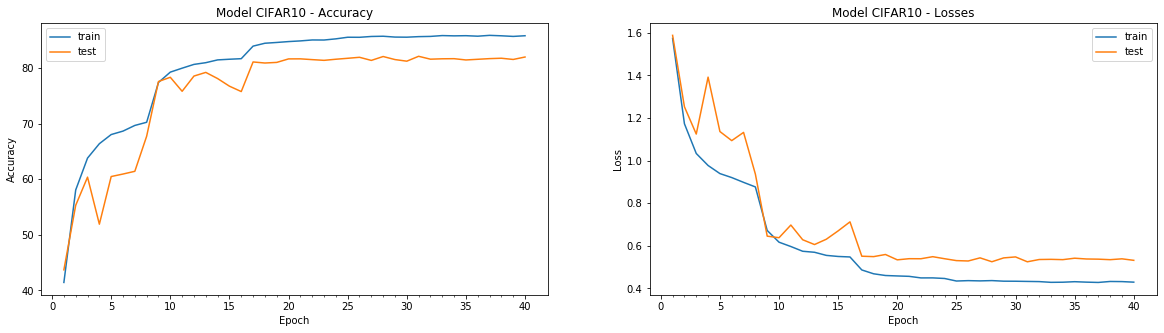

In [13]:
print("\nPloting Accuracy and Loss history: {}\n".format(model_name))
putils.plot_model_history(model_name, 
                   train_acc,test_acc,
                   train_losses,test_losses,
                   save_filename = "model_history")

# Visualize few misclassified images and get an understanding on for what set of unseen data model is not performing good 


Ploting misclassified images: Model CIFAR10



/content/session7/cifar10_net.py:77: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


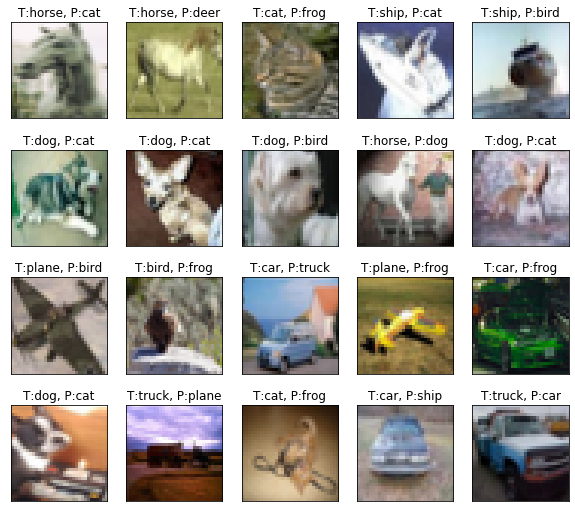

In [14]:
print("\nPloting misclassified images: {}\n".format(model_name))
putils.plot_misclassified_images(model, 
                          device, 
                          classes,
                          testloader=test_loader,
                          save_filename="model_misclassified")